# Dataset Sumber
Dataset ini dapat diunduh dari [Kaggle - Melbourne Housing Market](https://www.kaggle.com/datasets/shree1992/housedata)

# Tentang Dataset
Pasar properti, seperti di Sydney dan Melbourne, menghadirkan peluang menarik bagi analis data untuk menganalisis dan memprediksi arah pergerakan harga properti. Prediksi harga properti menjadi semakin penting dan bermanfaat. Harga properti merupakan indikator yang baik untuk kondisi pasar secara keseluruhan dan kesehatan ekonomi suatu negara

# Deskripsi Masalah
Dataset berisi catatan penjualan properti dengan kolom utama seperti tanggal transaksi (`date`), harga jual (`price`), fitur fisik rumah (mis. `bedrooms`, `bathrooms`, `sqft_living`, `sqft_above`, `sqft_basement`, `floors`), informasi lokasi (`street`, `city`, `statezip`, `country`), serta atribut kondisi dan umur (`condition`, `yr_built`, `yr_renovated`). Tantangan yang tampak dari dataset ini meliputi:

- Format dan kualitas data yang beragam: beberapa kolom alamat gabungan, potensi entri duplikat, dan nilai yang hilang atau tidak konsisten.
- Distribusi target (`price`) kemungkinan sangat miring dan mengandung outlier (ada rumah dengan harga ekstrem).
- Fitur waktu serta tahun bangun/renovasi memerlukan transformasi menjadi fitur umur atau waktu sejak renovasi.
- Informasi lokasi tersedia sebagai teks sehingga perlu penanganan untuk ekstraksi fitur spasial atau agregasi berdasarkan area/kode pos.
- Fitur struktural (luas, jumlah kamar, basement) mungkin saling berkorelasi — perlu deteksi multikolinearitas dan feature engineering.
- Target adalah variabel kontinu sehingga ini merupakan masalah regresi; perlu strategi untuk outlier dan heteroskedastisitas.

# Tujuan
Hasil yang ingin dicapai adalah mengembangkan model Machine Learning menggunakan pendekatan Supervised Learning untuk memprediksi harga properti berdasarkan fitur-fitur yang relevan. Model ini akan membantu dalam mengidentifikasi tren harga properti dan memberikan wawasan yang berguna bagi pembeli, penjual, dan investor di pasar properti.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
df = pd.read_csv('data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


**Arti kolom :**
1. date : tanggal rumah tersebut dijual
2. price : harga rumah
3. bedrooms : jumlah kamar tidur
4. bathrooms : jumlah kamar mandi
5. sqft_living : luas bangunan
6. sqft_lot : luas tanah
7. floors : jumlah lantai
8. waterfronts : apakah rumah berbatasan dengan air
9. view : view dari rumah
10. condition : kondisi rumah
11. sqft_above : luas bangunan yang ada di atas tanah
12. sqft_basement : luas bangunan yang ada di bawah tanah
13. yr_built : tahun dibangun
14. yr_renovated : tahun direnovasi
15. street : jalan
16. city : kota
17. statezip : kode pos
18. country : negara

# Data Cleaning

In [ ]:
# Membuat dan melatih model klasifikasi
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Dapat dilihat bahwa tidak terdapat duplikasi data maupun data yang hilang.

# Data Exploration

In [10]:
# melihat tipe data masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [11]:
# melihat info statistikal data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


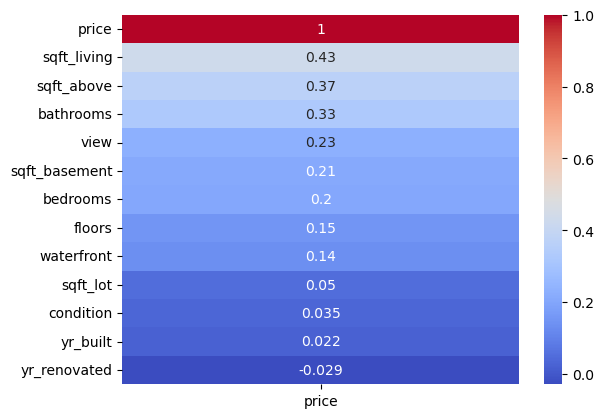

In [12]:
# melihat korelasi antarkolom dengan kolom price (hanya kolom numerik)
num_df = df.select_dtypes(include=[np.number])
corr_with_price = num_df.corr()[['price']].sort_values(by='price', ascending=False)
sns.heatmap(corr_with_price, annot=True, cmap='coolwarm')
plt.show()

Heatmap berfungsi untuk menunjukkan korelasi antar variabel berdasarkan variabel price. Semakin ke bawah (semakin gelap warnanya), korelasi antar varibel semakin jauh.

Berdasarkan heatmap di atas maka 'sqft_living', 'sqft_above', 'bathrooms', 'view', dan 'sqft_basement' akan digunakan sebagai variabel independen pada regresi kali ini.

# Data Preprocessing

In [13]:
df[df==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

Pada kolom price terdapat 49 baris yang memiliki nilai 0, kemudian pada kolom bathrooms dan bedrooms memiliki masing-masing 2 baris yang memiliki 0. Baris tersebut akan didrop karena tidak mungkin memiliki nilai 0.

In [14]:
df.drop(df[df['price'] == 0].index, inplace = True)
df.drop(df[df['bedrooms'] == 0].index, inplace = True)
df.drop(df[df['bathrooms'] == 0].index, inplace = True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


### Mendeteksi Outliers
Outliers yang akan dideteksi adalah dari variabel 'price', 'sqft_living', 'sqft_above', dan 'sqft_basement'. Hal ini berdasarkan dari statistikal data yang telah dijalankan sebelumnya. Variabel yang memiliki selisih nilai min dan max yang besar akan dideteksi outliersnya.

Boxplot berfungsi untuk mengobservasi data berdasarkan Median, Kuartil 1, Kuartil 3, Nilai data terendah, dan Nilai data tertinggi dari data yang nantinya akan terdeteksi outliers dari variabel.

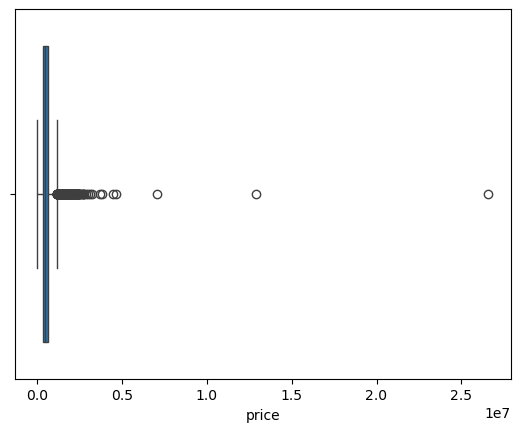

In [15]:
sns.boxplot(x=df['price']);

In [16]:
Q1_price = df.price.quantile(0.25)
Q3_price = df.price.quantile(0.75)
IQR_price = Q3_price- Q1_price 
price_lowerend = Q1_price - (1.5 * IQR_price)
price_upperend = Q3_price + (1.5 * IQR_price)

In [17]:
# dataset baru setelah outliers didrop
new_df = df[(df.price>price_lowerend)&(df.price<price_upperend)]
new_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Kemudian lakukan untuk kolom-kolom berikutnya.

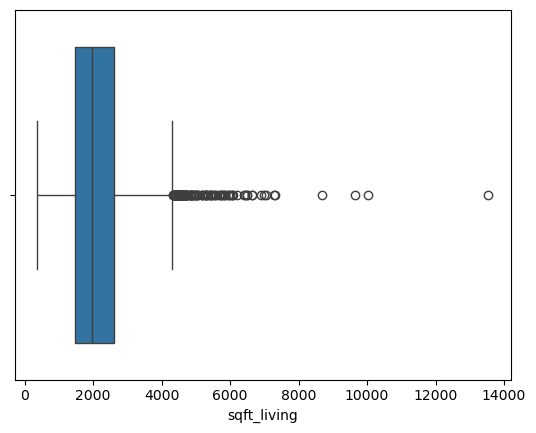

In [18]:
sns.boxplot(x=df['sqft_living']);

In [19]:
Q1_living = df.sqft_living.quantile(0.25)
Q3_living = df.sqft_living.quantile(0.75)
IQR_living = Q3_living - Q1_living 
living_lowerend = Q1_living - (1.5 * IQR_living)
living_upperend = Q3_living + (1.5 * IQR_living)

In [20]:
new_df2 = new_df[(new_df.sqft_living>living_lowerend)&(new_df.sqft_living<living_upperend)]
new_df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


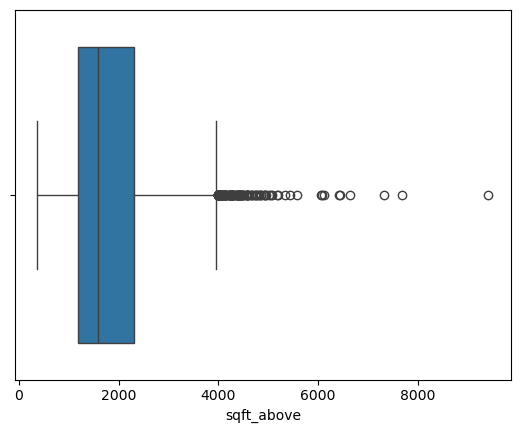

In [21]:
sns.boxplot(x=df['sqft_above']);

In [22]:
Q1_above = df.sqft_above.quantile(0.25)
Q3_above = df.sqft_above.quantile(0.75)
IQR_above = Q3_above - Q1_above 
above_lowerend = Q1_above - (1.5 * IQR_above)
above_upperend = Q3_above + (1.5 * IQR_above)

In [23]:
new_df3 = new_df2[(new_df2.sqft_above>above_lowerend)&(new_df2.sqft_above<above_upperend)]
new_df3

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


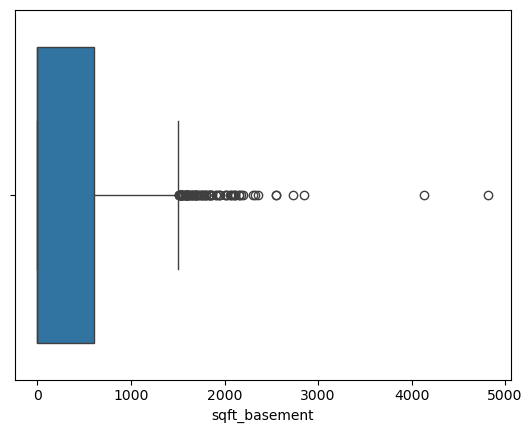

In [24]:
sns.boxplot(x=df['sqft_basement']);

In [25]:
Q1_basement = df.sqft_basement.quantile(0.25)
Q3_basement = df.sqft_basement.quantile(0.75)
IQR_basement = Q3_basement - Q1_basement 
basement_lowerend = Q1_basement - (1.5 * IQR_basement)
basement_upperend = Q3_basement + (1.5 * IQR_basement)

In [26]:
final_df = new_df3[(new_df3.sqft_basement>basement_lowerend)&(new_df3.sqft_basement<basement_upperend)]
final_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


**final_df adalah dataset setelah outliers yang telah dideteksi dihilangkan.**

# Feature Selection

Yang menjadi variabel dependen adalah 'price', sedangkan untuk variabel independen kami memilih 'sqft_living', 'sqft_above', 'bathrooms', 'view', dan 'sqft_basement'. Kami memilih variabel-variabel yang memiliki tingkat korelasi paling tinggi terhadap variabel 'price'.

In [27]:
# variabel independen
x = final_df[['sqft_living', 'sqft_above', 'bathrooms', 'view', 'sqft_basement',]]
# variabel dependen
y = final_df['price']

# Splitting Data

In [28]:
# data yang digunakan untuk training sebanyak 70% dan testing sebanyak 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"Training set size: {x_train.shape[0]} samples")
print(f"Testing set size: {x_test.shape[0]} samples")
print(f"\nTraining data sample:")
print(x_train.head())
print(f"\nTesting target sample:")
print(y_test.head())

Training set size: 2936 samples
Testing set size: 1259 samples

Training data sample:
      sqft_living  sqft_above  bathrooms  view  sqft_basement
3431         1590        1590       1.75     0              0
1507         2680        2680       2.50     0              0
2963         1820        1820       2.50     0              0
207          2680        2680       2.00     0              0
937          2690        2690       3.00     0              0

Testing target sample:
3523    665000.0
1450    225000.0
199     365000.0
956     755000.0
1631    740000.0
Name: price, dtype: float64


# Modelling menggunakan Supervised Learning

In [ ]:
# Membuat dan melatih model regresi
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

# Training model
lr_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
dt_model.fit(x_train, y_train)

print("Model berhasil dilatih!")
print("- Linear Regression")
print("- Random Forest Regressor") 
print("- Decision Tree Regressor")

Model berhasil dilatih!
- Linear Regression
- Random Forest Regressor
- Decision Tree Regressor


# Evaluasi Model Regresi

In [39]:
# Prediksi pada data testing
lr_pred = lr_model.predict(x_test)
rf_pred = rf_model.predict(x_test)
dt_pred = dt_model.predict(x_test)

# Evaluasi dengan metrik regresi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n=== {model_name} ===")
    print(f"MAE (Mean Absolute Error): ${mae:,.2f}")
    print(f"MSE (Mean Squared Error): ${mse:,.2f}")
    print(f"RMSE (Root Mean Squared Error): ${rmse:,.2f}")
    print(f"R² Score: {r2:.4f}")
    
    return mae, mse, rmse, r2

# Evaluasi semua model
lr_metrics = evaluate_regression_model(y_test, lr_pred, "Linear Regression")
rf_metrics = evaluate_regression_model(y_test, rf_pred, "Random Forest")
dt_metrics = evaluate_regression_model(y_test, dt_pred, "Decision Tree")


=== Linear Regression ===
MAE (Mean Absolute Error): $126,955.22
MSE (Mean Squared Error): $24,867,331,408.08
RMSE (Root Mean Squared Error): $157,693.79
R² Score: 0.4123

=== Random Forest ===
MAE (Mean Absolute Error): $135,479.61
MSE (Mean Squared Error): $29,867,236,208.95
RMSE (Root Mean Squared Error): $172,821.40
R² Score: 0.2942

=== Decision Tree ===
MAE (Mean Absolute Error): $162,798.86
MSE (Mean Squared Error): $45,068,967,826.57
RMSE (Root Mean Squared Error): $212,294.53
R² Score: -0.0651


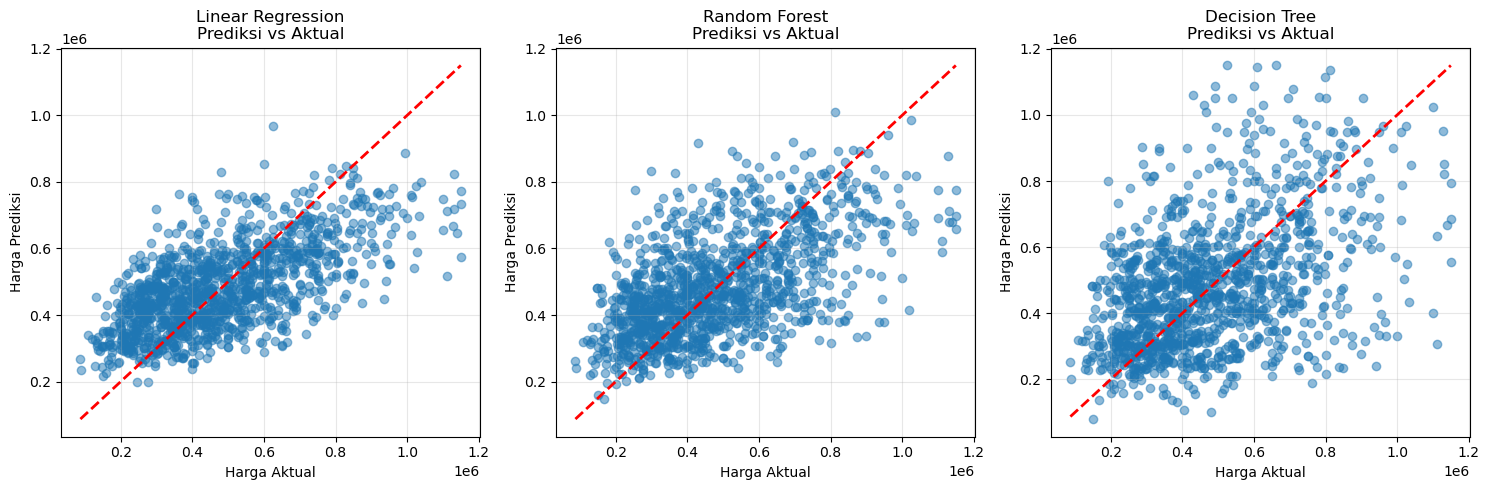

In [40]:
# Visualisasi perbandingan prediksi vs aktual
plt.figure(figsize=(15, 5))

models = [('Linear Regression', lr_pred), ('Random Forest', rf_pred), ('Decision Tree', dt_pred)]

for i, (name, pred) in enumerate(models, 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Harga Aktual')
    plt.ylabel('Harga Prediksi')
    plt.title(f'{name}\nPrediksi vs Aktual')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Konversi ke Klasifikasi untuk Classification Report & Confusion Matrix

**Catatan:** Masalah prediksi harga adalah regresi (nilai kontinu), bukan klasifikasi. Namun untuk keperluan demonstrasi classification report dan confusion matrix, kita akan mengkonversi harga menjadi kategori: "Murah", "Sedang", "Mahal".

In [41]:
# Fungsi untuk mengkategorikan harga
def categorize_price(price):
    if price < 300000:
        return 0  # Murah
    elif price < 600000:
        return 1  # Sedang
    else:
        return 2  # Mahal

# Konversi harga menjadi kategori
y_train_cat = y_train.apply(categorize_price)
y_test_cat = y_test.apply(categorize_price)

# Label kategori untuk interpretasi
price_labels = {0: 'Murah (<$300k)', 1: 'Sedang ($300k-$600k)', 2: 'Mahal (>$600k)'}

print("Distribusi kategori harga pada data training:")
print(y_train_cat.value_counts().sort_index())
print("\nDistribusi kategori harga pada data testing:")
print(y_test_cat.value_counts().sort_index())

Distribusi kategori harga pada data training:
price
0     620
1    1575
2     741
Name: count, dtype: int64

Distribusi kategori harga pada data testing:
price
0    269
1    656
2    334
Name: count, dtype: int64


In [ ]:
# Model klasifikasi
clf_model = RandomForestClassifier(random_state=42, n_estimators=100)
clf_model.fit(x_train, y_train_cat)

# Prediksi kategori harga
y_pred_cat = clf_model.predict(x_test)

print("Model klasifikasi berhasil dilatih dan diprediksi!")
print(f"Akurasi: {clf_model.score(x_test, y_test_cat):.4f}")

Model klasifikasi berhasil dilatih dan diprediksi!
Akurasi: 0.5592


In [37]:
# CLASSIFICATION REPORT
print("=" * 50)
print("CLASSIFICATION REPORT")
print("=" * 50)
print(classification_report(y_test_cat, y_pred_cat, 
                          target_names=['Murah (<$300k)', 'Sedang ($300k-$600k)', 'Mahal (>$600k)']))

CLASSIFICATION REPORT
                      precision    recall  f1-score   support

      Murah (<$300k)       0.41      0.32      0.36       269
Sedang ($300k-$600k)       0.59      0.68      0.63       656
      Mahal (>$600k)       0.58      0.51      0.54       334

            accuracy                           0.56      1259
           macro avg       0.53      0.50      0.51      1259
        weighted avg       0.55      0.56      0.55      1259



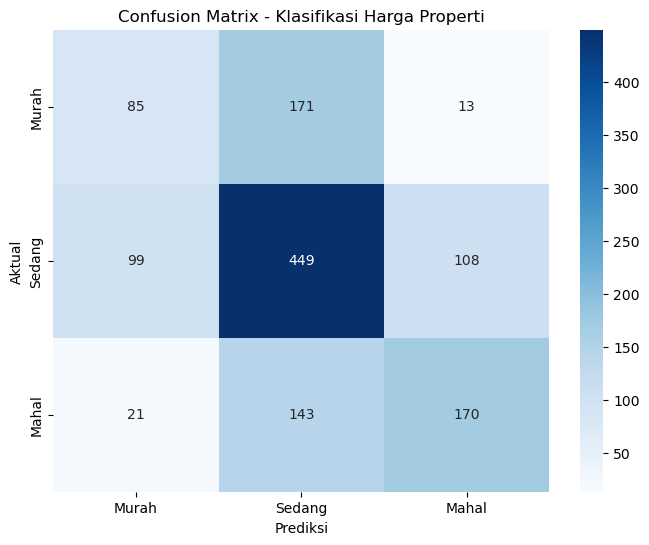

=== CONFUSION MATRIX ===
Confusion Matrix:
[[ 85 171  13]
 [ 99 449 108]
 [ 21 143 170]]

Matrix explanation:
- Total sampel: 1259
- Prediksi benar: 704 (55.9%)
- Prediksi salah: 555 (44.1%)


In [43]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test_cat, y_pred_cat)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Murah', 'Sedang', 'Mahal'],
            yticklabels=['Murah', 'Sedang', 'Mahal'])
plt.title('Confusion Matrix - Klasifikasi Harga Properti')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

print("=== CONFUSION MATRIX ===")
print("Confusion Matrix:")
print(cm)
print(f"\nMatrix explanation:")
print(f"- Total sampel: {cm.sum()}")
print(f"- Prediksi benar: {np.trace(cm)} ({np.trace(cm)/cm.sum()*100:.1f}%)")
print(f"- Prediksi salah: {cm.sum() - np.trace(cm)} ({(cm.sum() - np.trace(cm))/cm.sum()*100:.1f}%)")

# Ringkasan Evaluasi Model

=== PERBANDINGAN MODEL REGRESI ===
               Model          MAE         RMSE  R² Score
0  Linear Regression  126955.2247  157693.7900    0.4123
1      Random Forest  135479.6082  172821.3997    0.2942
2      Decision Tree  162798.8633  212294.5308   -0.0651

🏆 Model terbaik: Linear Regression
📊 R² Score terbaik: 0.4123


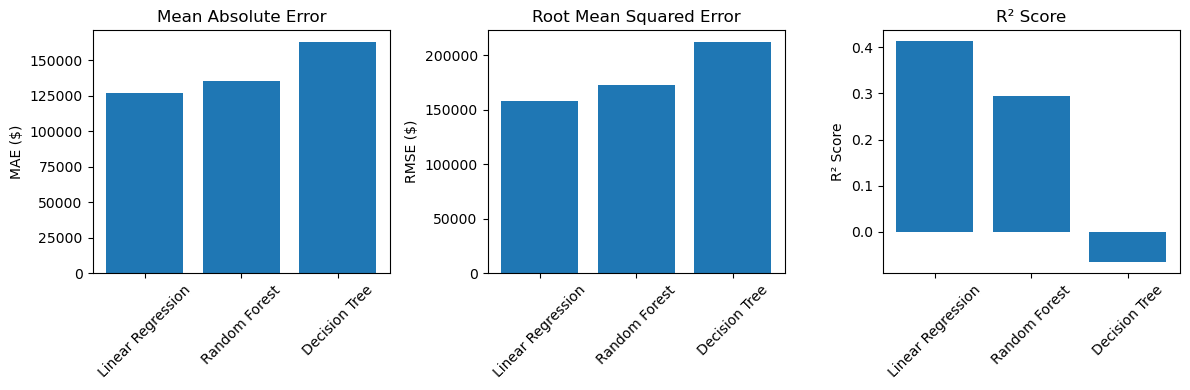

In [ ]:
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree'],
    'MAE': [lr_metrics[0], rf_metrics[0], dt_metrics[0]], 
    'RMSE': [lr_metrics[2], rf_metrics[2], dt_metrics[2]],
    'R² Score': [lr_metrics[3], rf_metrics[3], dt_metrics[3]]
})

print("=== PERBANDINGAN MODEL REGRESI ===")
print(model_comparison.round(4))

# Mencari model terbaik berdasarkan R² Score
best_model_idx = model_comparison['R² Score'].idxmax()
best_model = model_comparison.loc[best_model_idx, 'Model']
best_r2 = model_comparison.loc[best_model_idx, 'R² Score']

print(f"\n🏆 Model terbaik: {best_model}")
print(f"📊 R² Score terbaik: {best_r2:.4f}")

# Visualisasi perbandingan
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(model_comparison['Model'], model_comparison['MAE'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE ($)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(model_comparison['Model'], model_comparison['RMSE'])
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE ($)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(model_comparison['Model'], model_comparison['R² Score'])
plt.title('R² Score')
plt.ylabel('R² Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()